In [1]:
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_dir='/content/gdrive/My Drive/transferlearning_wo_segmen_w_augmen_data/train_seg'
val_dir='/content/gdrive/My Drive/transferlearning_wo_segmen_w_augmen_data/val_seg'


train_gen = tf.keras.utils.image_dataset_from_directory(
    directory = train_dir,
    shuffle = True,
    image_size = (192, 192)
)
val_gen = tf.keras.utils.image_dataset_from_directory(
    directory = val_dir,
    shuffle = True,
    image_size = (192, 192)
)

Found 800 files belonging to 2 classes.
Found 146 files belonging to 2 classes.


In [4]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (192,192,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [5]:
# base_model.trainable = False
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(feature_batch_average.shape)
base_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

model = tf.keras.Sequential([
  # tf.keras.layers.RandomFlip('horizontal'),
  # tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.Rescaling(1./255),
  base_model,
  global_average_layer,
  prediction_layer
])
# model = tf.keras.Model(model)

In [6]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [7]:
history = model.fit(train_gen,
                    epochs=100,
                    validation_data=val_gen)

Epoch 1/100
25/25 [==============================] - 90s 3s/step - loss: 4.4518 - accuracy: 0.6044 - val_loss: 4.2040 - val_accuracy: 0.6199
Epoch 2/100
25/25 [==============================] - 30s 1s/step - loss: 2.8501 - accuracy: 0.6737 - val_loss: 3.0518 - val_accuracy: 0.6747
Epoch 3/100
25/25 [==============================] - 29s 1s/step - loss: 1.3054 - accuracy: 0.7731 - val_loss: 2.8976 - val_accuracy: 0.6781
Epoch 4/100
25/25 [==============================] - 29s 1s/step - loss: 0.5849 - accuracy: 0.8475 - val_loss: 2.8824 - val_accuracy: 0.6781
Epoch 5/100
25/25 [==============================] - 33s 1s/step - loss: 0.4321 - accuracy: 0.8888 - val_loss: 2.7123 - val_accuracy: 0.6952
Epoch 6/100
25/25 [==============================] - 30s 1s/step - loss: 0.3358 - accuracy: 0.9044 - val_loss: 2.6046 - val_accuracy: 0.7089
Epoch 7/100
25/25 [==============================] - 33s 1s/step - loss: 0.2876 - accuracy: 0.9237 - val_loss: 2.6100 - val_accuracy: 0.7089
Epoch 8/100
2

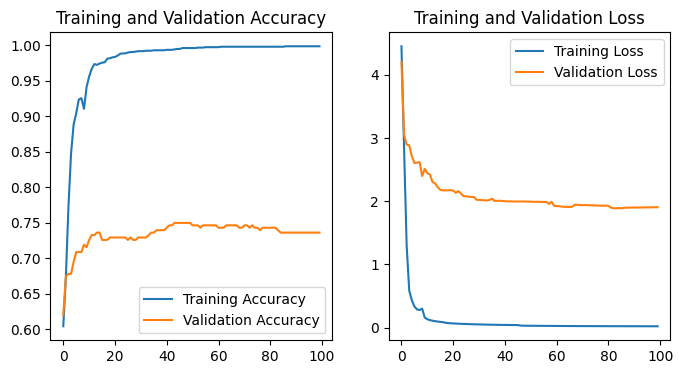

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_mobilenet_w_segm_w_augmen.png")
plt.show()

### VGG16

In [9]:
input_size=(192,192,3)
vgg_model=tf.keras.applications.VGG16(input_shape=input_size,include_top=False,weights='imagenet')

vgg_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

vggs_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  vgg_model,
  global_average_layer,
  prediction_layer
])

58889256/58889256 [==============================] - 0s 0us/step


In [10]:
base_learning_rate = 0.0001
vggs_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [12]:
history_vgg = vggs_model.fit(train_gen,
                    epochs=7,
                    validation_data=val_gen)

Epoch 1/7
25/25 [==============================] - 434s 17s/step - loss: 4.7342 - accuracy: 0.5000 - val_loss: 6.3541 - val_accuracy: 0.5000
Epoch 2/7
25/25 [==============================] - 435s 17s/step - loss: 4.3979 - accuracy: 0.5006 - val_loss: 5.8439 - val_accuracy: 0.5000
Epoch 3/7
25/25 [==============================] - 432s 17s/step - loss: 4.3401 - accuracy: 0.5013 - val_loss: 5.4090 - val_accuracy: 0.5000
Epoch 4/7
23/25 [==========================>...] - ETA: 29s - loss: 4.3057 - accuracy: 0.5020

KeyboardInterrupt: 

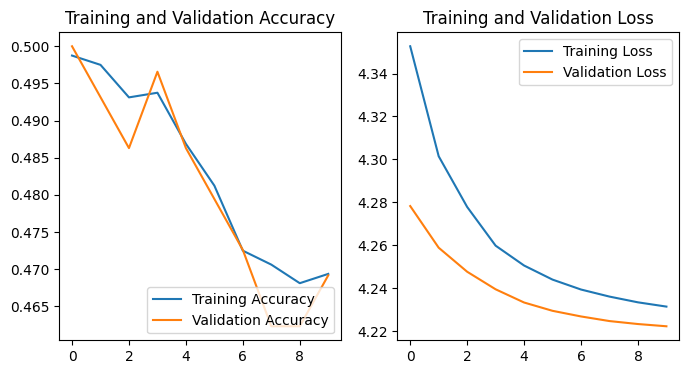

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_vgg_wo_segm_w_augmen.png")
plt.show()

### EfficientNetB2

In [13]:
input_size=(192,192,3)
effic_model=tf.keras.applications.EfficientNetB2(input_shape=input_size,include_top=False,weights='imagenet')

effic_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)

effics_model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  effic_model,
  global_average_layer,
  prediction_layer
])

31790344/31790344 [==============================] - 0s 0us/step


In [14]:
base_learning_rate = 0.0001
effics_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

In [15]:
history_effic = effics_model.fit(train_gen,
                    epochs=25,
                    validation_data=val_gen)

Epoch 1/25
25/25 [==============================] - 131s 3s/step - loss: 1.6552 - accuracy: 0.4988 - val_loss: 0.7736 - val_accuracy: 0.5000
Epoch 2/25
25/25 [==============================] - 82s 3s/step - loss: 0.7519 - accuracy: 0.5250 - val_loss: 0.7111 - val_accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 78s 3s/step - loss: 0.7033 - accuracy: 0.5269 - val_loss: 0.6963 - val_accuracy: 0.4966
Epoch 4/25
25/25 [==============================] - 80s 3s/step - loss: 0.6935 - accuracy: 0.5675 - val_loss: 0.6930 - val_accuracy: 0.4966
Epoch 5/25
25/25 [==============================] - 88s 3s/step - loss: 0.6777 - accuracy: 0.5819 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 6/25
25/25 [==============================] - 80s 3s/step - loss: 0.6762 - accuracy: 0.6313 - val_loss: 0.6954 - val_accuracy: 0.5034
Epoch 7/25
25/25 [==============================] - 80s 3s/step - loss: 0.6677 - accuracy: 0.6356 - val_loss: 0.7003 - val_accuracy: 0.4863
Epoch 8/25
25/25 [=

In [ ]:
acc = history_effic.history['accuracy']
val_acc = history_effic.history['val_accuracy']

loss = history_effic.history['loss']
val_loss = history_effic.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("epoch_100_inception_wo_segm_w_augmen.png")
plt.show()